In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
f = pd.read_csv('Section6-Homework-Data.csv', encoding = "ISO-8859-1")
f.head(2)

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4


In [6]:
def original():
    print('original rows: %d\noriginal cols: %d'%\
          (f.shape[0],f.shape[1]))
    return (f.shape[0],f.shape[1])
original()

original rows: 608
original cols: 18


(608, 18)

In [94]:
#export to excel
dimension = original()
dimension = [dimension[0],dimension[1]]
dimension = pd.DataFrame(data=dimension, index=['Original rows', 'Original cols:'])
dimension.to_excel('movie.xlsx', sheet_name='original stats', header=False )

original rows: 608
original cols: 20


In [28]:
#fix column names
f.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [29]:
f.columns=['Day', 'Director', 'Genre', 'MovieTitle', 'Release',
       'Studio', 'Adj_GrossM', 'BudgetM', 'GrossM',
       'IMDb', 'MovieLens', 'OverseasM', 'Overseas%',
       'ProfitM', 'Profit%', 'Runtime', 'USM',
       'Gross%US']

In [30]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day           608 non-null object
Director      608 non-null object
Genre         608 non-null object
MovieTitle    608 non-null object
Release       608 non-null object
Studio        608 non-null object
Adj_GrossM    608 non-null object
BudgetM       608 non-null float64
GrossM        608 non-null object
IMDb          608 non-null float64
MovieLens     608 non-null float64
OverseasM     608 non-null object
Overseas%     608 non-null float64
ProfitM       608 non-null object
Profit%       608 non-null float64
Runtime       608 non-null int64
USM           608 non-null float64
Gross%US      608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ KB


In [31]:
#convert date to datetime
f['ReleseDate']=pd.to_datetime(f['Release'])
f.head(2)

,Day,Director,Genre,MovieTitle,Release,Studio,Adj_GrossM,BudgetM,GrossM,IMDb,MovieLens,OverseasM,Overseas%,ProfitM,Profit%,Runtime,USM,Gross%US,ReleseDate
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6,2015-05-22
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4,2014-03-14


In [32]:
#export year
f['Year']=pd.DatetimeIndex(f['ReleseDate']).year
f['Year']=f['Year'].astype('category')
f['Year'][0:5]

0    2015
1    2014
2    2014
3    2012
4    2013
Name: Year, dtype: category
Categories (45, int64): [1939, 1961, 1967, 1972, ..., 2012, 2013, 2014, 2015]

In [97]:
#append years to excel
y=f['Year'].unique().tolist()
y=[y[0],y[-1]]
y=pd.DataFrame(y, columns=['Year']).transpose()
y[y.columns[::-1]]

from openpyxl import load_workbook
book = load_workbook('movie.xlsx')
writer = pd.ExcelWriter('movie.xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

y.to_excel(writer, "original stats", header=False, startrow=3)

writer.save()

In [98]:
#clear numerical columns and convert to float
for i in f.loc[:,'Adj_GrossM':]:
    try:
        f[i]=f[i].str.replace(',','')
        f[i]=f[i].astype('float')
    except:
        print('not coverted: '+i)
#f.info()

not coverted: BudgetM
not coverted: IMDb
not coverted: MovieLens
not coverted: Overseas%
not coverted: Profit%
not coverted: Runtime
not coverted: USM
not coverted: Gross%US
not coverted: ReleseDate
not coverted: Year


In [99]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 20 columns):
Day           608 non-null object
Director      608 non-null object
Genre         608 non-null object
MovieTitle    608 non-null object
Release       608 non-null object
Studio        608 non-null object
Adj_GrossM    608 non-null float64
BudgetM       608 non-null float64
GrossM        608 non-null float64
IMDb          608 non-null float64
MovieLens     608 non-null float64
OverseasM     608 non-null float64
Overseas%     608 non-null float64
ProfitM       608 non-null float64
Profit%       608 non-null float64
Runtime       608 non-null int64
USM           608 non-null float64
Gross%US      608 non-null float64
ReleseDate    608 non-null datetime64[ns]
Year          608 non-null category
dtypes: category(1), datetime64[ns](1), float64(11), int64(1), object(6)
memory usage: 92.5+ KB


In [100]:
#check missing value
f.isnull().sum()

Day           0
Director      0
Genre         0
MovieTitle    0
Release       0
Studio        0
Adj_GrossM    0
BudgetM       0
GrossM        0
IMDb          0
MovieLens     0
OverseasM     0
Overseas%     0
ProfitM       0
Profit%       0
Runtime       0
USM           0
Gross%US      0
ReleseDate    0
Year          0
dtype: int64

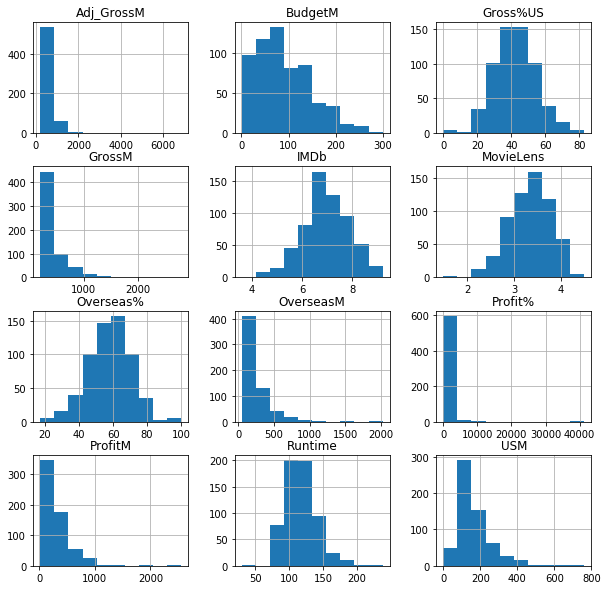

In [101]:
#check distribution
f.hist(figsize=(10,10));

nope:Day
nope:Director
nope:Genre
nope:MovieTitle
nope:Release
nope:Studio
nope:ReleseDate
nope:Year


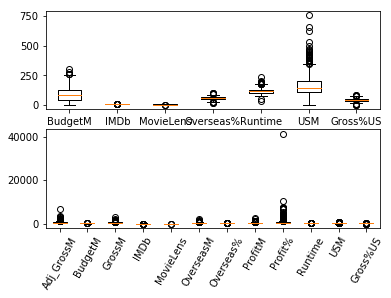

In [102]:
#checking for outlayer
l=[]
h=[]
for i in f:
    
    try:
        if f[i].max() < 1000:
            #print(f[i].max())
            l.append(i)
        h.append(i)
        #print('nagy '+i) 
    except:
        print('nope:'+i)
#print(l)
#print(h)
fig, axes =plt.subplots(2,1)
#l =['BudgetM','IMDb']
axes[0].boxplot(f[l].values)
axes[0].set_xticklabels(l)
axes[1].boxplot(f[h].values)
axes[1].set_xticklabels(h, rotation=60);

In [103]:
#check outlayer manually
outlayer=f.loc[f['Profit%']>20000]
outlayer

,Day,Director,Genre,MovieTitle,Release,Studio,Adj_GrossM,BudgetM,GrossM,IMDb,MovieLens,OverseasM,Overseas%,ProfitM,Profit%,Runtime,USM,Gross%US,ReleseDate,Year
209,Wednesday,"Daniel Myrick, Eduardo Sanchez",horror,The Blair Witch Project,14/07/1999,Art House Studios,354.9,0.6,248.6,6.4,2.88,108.1,43.5,248.0,41333.3,81,140.5,56.5,1999-07-14,1999


In [104]:
#check the preplacement option for yearly or genre average
import numpy as np
#year99=f.pivot_table(index=['Year','Genre'], aggfunc=[np.mean])
year99=f.pivot_table(index='Year', aggfunc=np.mean)
year99=year99.query('Year==1999')
#year99.query('Genre==["horror"]')
outlayer2=outlayer.append(year99, ignore_index=True)
outlayer2

,Adj_GrossM,BudgetM,Day,Director,Genre,Gross%US,GrossM,IMDb,MovieLens,MovieTitle,Overseas%,OverseasM,Profit%,ProfitM,Release,ReleseDate,Runtime,Studio,USM,Year
0,354.900000,0.600000,Wednesday,"Daniel Myrick, Eduardo Sanchez",horror,56.500000,248.600000,6.400000,2.880000,The Blair Witch Project,43.500000,108.100000,41333.300000,248.000000,14/07/1999,1999-07-14,81.000000,Art House Studios,140.500000,1999
1,522.768421,72.821053,NaN,NaN,NaN,45.873684,366.231579,6.847368,3.303684,NaN,54.126316,200.931579,2786.957895,293.410526,NaN,NaT,112.157895,NaN,165.305263,NaN


In [105]:
#BudgrtM, ProfitM correction with year 1999 average
f['BudgetM'][209]=outlayer2.at[1,"BudgetM"]
f['Profit%'][209]=outlayer2.at[1,'Profit%']
f['Profit%'][209]

2786.9578947368427

### Descriptive a analysis

In [106]:
#10 highest profit
topprofit=f.sort_values('ProfitM', ascending=False).head(10)
cols=['MovieTitle','Genre','Year','ProfitM']
topprofit=topprofit[cols]
topprofit

,MovieTitle,Genre,Year,ProfitM
605,Avatar,sci-fi,2009,2551.0
606,Titanic,drama,1997,1986.8
594,Furious 7,action,2015,1321.6
596,Marvel's The Avengers,action,2012,1298.6
590,Harry Potter and the Deathly Hallows Part 2,fantasy,2011,1216.5
586,Frozen,animation,2013,1124.2
588,Avengers: Age of Ultron,action,2015,1121.6
584,Jurassic World,action,2015,1030.9
592,The Lord of the Rings: The Return of the King,fantasy,2003,1025.9
583,Iron Man 3,action,2013,1015.4


In [131]:
count=topprofit.Genre.value_counts()
count

action       5
fantasy      2
sci-fi       1
animation    1
drama        1
Name: Genre, dtype: int64

In [133]:
#export to excell
book = load_workbook('movie.xlsx')
writer = pd.ExcelWriter('movie.xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

topprofit.to_excel(writer, "topprofit", index=False)
count.to_excel(writer,'topprofit', startrow=len(topprofit)+3)


writer.save()

In [108]:
#10 less lucrative movies
lessprofit=f.sort_values('ProfitM').head(10)
lessprofit=lessprofit[cols]
lessprofit

,MovieTitle,Genre,Year,ProfitM
27,Green Lantern,action,2011,19.9
121,John Carter,sci-fi,2012,20.4
0,Tomorrowland,action,2015,32.1
73,The Lone Ranger,action,2013,35.5
152,Wild Wild West,action,1999,47.1
31,The Sorcerer's Apprentice,action,2010,55.3
4,White House Down,action,2013,55.4
50,Fun with Dick and Jane,comedy,2005,62.0
239,Teenage Mutant Ninja Turtles,action,1990,77.0
87,Master and Commander: The Far Side of the World,action,2003,77.0


In [121]:
count=lessprofit['Genre'].value_counts()
count

action    8
sci-fi    1
comedy    1
Name: Genre, dtype: int64

In [124]:
#export to exccel
lessprofit.to_excel(writer,sheet_name='lessprofit', index=False)
count.to_excel(writer,'lessprofit', startrow=len(lessprofit)+3)
writer.save()

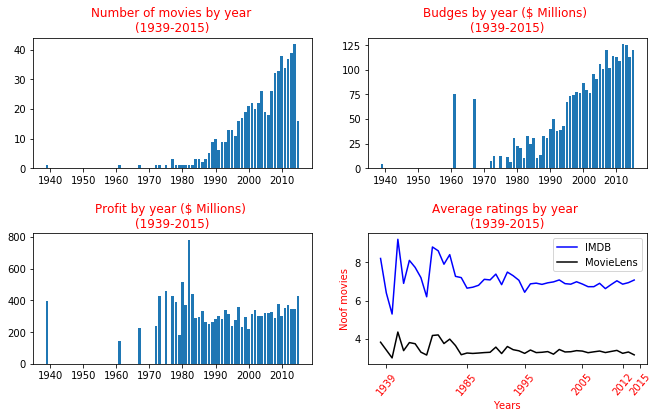

In [233]:
fig, axes =plt.subplots(2,2, figsize=(11,6) )
moviesyear=f.groupby('Year').count().MovieTitle
budgetyear=f.groupby('Year').mean().BudgetM
profityear=f.groupby('Year').mean().ProfitM
imdbyear=f.groupby('Year').mean().IMDb
mlensyear=f.groupby('Year').mean().MovieLens

axes[0,0].bar(moviesyear.index,moviesyear)
axes[0,1].bar(moviesyear.index,budgetyear)
axes[1,0].bar(moviesyear.index,profityear)
axes[1,1].plot(imdbyear.tolist(), label='IMDB', color='Blue')
axes[1,1].plot(mlensyear.tolist(), label='MovieLens', color='Black')

plt.legend()
plt.sca(axes[1, 1])
yearlabels=[imdbyear.index[0],imdbyear.index[14], imdbyear.index[24], \
            imdbyear.index[34], imdbyear.index[41],imdbyear.index[44]]
plt.xticks([1,15,25,35,42,45], yearlabels, color='red', rotation=50)
plt.xlabel('Years', color='Red')
plt.ylabel('Noof movies', color='Red')
axes[0,0].set_title('Number of movies by year \n(1939-2015)', color="Red")
axes[0,1].set_title('Budges by year ($ Millions) \n(1939-2015)', color="Red")
axes[1,0].set_title('Profit by year ($ Millions) \n(1939-2015)', color="Red")
axes[1,1].set_title('Average ratings by year \n(1939-2015)', color="Red")
plt.subplots_adjust(hspace= 0.5)
plt.savefig('barchart1.png', transparent=True);

Index(['Day', 'Director', 'Genre', 'MovieTitle', 'Release', 'Studio',
       'Adj_GrossM', 'BudgetM', 'GrossM', 'IMDb', 'MovieLens', 'OverseasM',
       'Overseas%', 'ProfitM', 'Profit%', 'Runtime', 'USM', 'Gross%US',
       'ReleseDate', 'Year'],
      dtype='object')

''

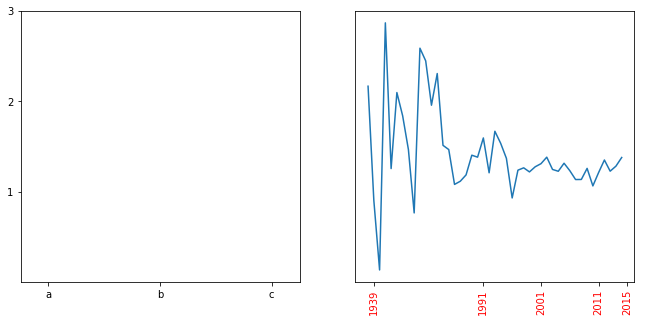

1991